# Running *species*

This tutorial shows what a typical workflow with *species* looks like. The photometric fluxes of the brown dwarf companion PZ Tel B is compared with a spectrum from the AMES-Cond atmospheric model.

## Initiating *species*

We start by importing the *species* toolkit.

In [1]:
import species

Next, the configuration file (*species_config.ini*) is read from the working folder with `SpeciesInit`. Since the file does not exist, it is created with default values for the path of the HDF5 database and the location where the external data is stored. The database and data folder are also created since this is the first time that we run *species* with this configuration file. 

In [2]:
species.SpeciesInit('./')

Initiating species v0.1.0... [DONE]
Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


## Adding model spectra

A `Database` object is now created which can be used for importing of data into the database.

In [3]:
database = species.Database()

The spectra of the AMES-Cond model are downloaded and added to the database. This requires sufficient disk storage in the *data_folder* that is set in the configuration file.

While the full AMES-Cond grid is downloaded, a restiction on the wavelength and T<sub>eff</sub> range can be used when the data is imported. Also the spectral resolution can be set to downsample the high-resolution of the original spectra spectra.

In [4]:
database.add_model(model='ames-cond',
                   wavel_range=(0.1, 6.),
                   teff_range=(2800., 3000.),
                   spec_res=1000.)

Unpacking AMES-Cond model spectra (823 MB)... [DONE]
Adding AMES-Cond model spectra... [DONE]                                  


## Adding companion data

The `data.companions` module contains a [dictionary with apparent magnitudes](https://github.com/tomasstolker/species/blob/master/species/data/companions.py) of directly imaged planets and brown dwarfs. Let's have a look which data are available.

In [5]:
database.list_companions()

Database: species_database.hdf5
Directly imaged companions: ['beta Pic b', 'HIP 65426 b', '51 Eri b', 'HR 8799 b', 'HR 8799 c', 'HR 8799 d', 'HR 8799 e', 'HD 95086 b', 'PDS 70 b', 'PDS 70 c', '2M1207 b', 'AB Pic B', 'HD 206893 B', 'GQ Lup B', 'PZ Tel B', 'kappa And b', 'ROXs 42 Bb', 'GJ 504 b', 'GU Psc b', '2M0103 ABb', '1RXS 1609 B', 'GSC 06214 B']


The distance and magnitudes of PZ Tel B are added to the database. This will automatically download the filter transmission profiles and a flux calibrated spectrum of Vega, which are used for the flux calibration.

In [6]:
database.add_companion(name='PZ Tel B')

Adding filter: Paranal/SPHERE.ZIMPOL_R_PRIM... [DONE]
Adding Vega spectrum... [DONE]
Adding filter: Paranal/SPHERE.ZIMPOL_I_PRIM... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_2... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_H23_3... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_1... [DONE]
Adding filter: Paranal/SPHERE.IRDIS_D_K12_2... [DONE]
Adding filter: Paranal/NACO.J... [DONE]
Adding filter: Paranal/NACO.H... [DONE]
Adding filter: Paranal/NACO.Ks... [DONE]
Adding filter: Paranal/NACO.Lp... [DONE]
Adding filter: Paranal/NACO.NB405... [DONE]
Adding filter: Paranal/NACO.Mp... [DONE]
Adding filter: Gemini/NICI.ED286... [DONE]
Adding filter: Gemini/NIRI.H2S1v2-1-G0220... [DONE]
Adding object: PZ Tel B... [DONE]


Alternatively, the `add_object` method of `Database` can be used for manually adding magnitudes and spectra of an individual object. Before coninuing, let's check the content of the database.

In [7]:
database.list_content()

Database content:
- filters: <HDF5 group "/filters" (2 members)>
	- Gemini: <HDF5 group "/filters/Gemini" (2 members)>
		- NICI.ED286: <HDF5 dataset "NICI.ED286": shape (2, 387), type "<f4">
		- NIRI.H2S1v2-1-G0220: <HDF5 dataset "NIRI.H2S1v2-1-G0220": shape (2, 129), type "<f4">
	- Paranal: <HDF5 group "/filters/Paranal" (12 members)>
		- NACO.H: <HDF5 dataset "NACO.H": shape (2, 23), type "<f4">
		- NACO.J: <HDF5 dataset "NACO.J": shape (2, 20), type "<f4">
		- NACO.Ks: <HDF5 dataset "NACO.Ks": shape (2, 27), type "<f4">
		- NACO.Lp: <HDF5 dataset "NACO.Lp": shape (2, 31), type "<f4">
		- NACO.Mp: <HDF5 dataset "NACO.Mp": shape (2, 18), type "<f4">
		- NACO.NB405: <HDF5 dataset "NACO.NB405": shape (2, 67), type "<f4">
		- SPHERE.IRDIS_D_H23_2: <HDF5 dataset "SPHERE.IRDIS_D_H23_2": shape (2, 113), type "<f4">
		- SPHERE.IRDIS_D_H23_3: <HDF5 dataset "SPHERE.IRDIS_D_H23_3": shape (2, 180), type "<f4">
		- SPHERE.IRDIS_D_K12_1: <HDF5 dataset "SPHERE.IRDIS_D_K12_1": shape (2, 175), type "

## Reading model spectra

Model spectra are read from the database by creating an object of `ReadModel`. The model name and optionally a wavelength range should be provided. The wavelength range should fit within the range that was specified in `add_model`.

In [8]:
readmodel = species.ReadModel(model='ames-cond',
                              wavel_range=(0.1, 6.))

Before extracting a spectrum, let's check which parameters are required for the AMES-Cond models.

In [9]:
readmodel.get_parameters()

['teff', 'logg']

And also the grid boundaries that are stored in the database.

In [10]:
readmodel.get_bounds()

{'teff': (2800.0, 3000.0), 'logg': (0.0, 6.0)}

The parameters are provided in a dictionary. Make sure to chose values within the grid boundaries. The radius (R<sub>Jup</sub>) and distance (pc) will scale the emitted spectrum to the observer. Without these values, the spectrum is provided at the outermost layer of the atmosphere.

In [11]:
model_param = {'teff': 2900., 'logg': 4.5, 'radius': 2.2, 'distance': 47.13}

The grid of spectra is linearly interpolated at a spectral resolution of 100 and stored in a `ModelBox`.

In [12]:
modelbox = readmodel.get_model(model_param=model_param,
                               spec_res=100.)

## Reading companion data

The photometry data of PZ Tel B are also read from the database and stored in an `ObjectBox`.

In [13]:
objectbox = database.get_object(object_name='PZ Tel B')

Getting object: PZ Tel B... [DONE]


## Opening Box objects

The `open_box` function can be used to view the content of a `Box` object. For example, the `ModelBox` contains several attributes, including the wavelength points and flux densities.

In [14]:
modelbox.open_box()

Opening ModelBox...
model = ames-cond
type = None
wavelength = [0.1       0.1001    0.1002001 ... 5.739604  5.7453437 5.751089 ]
flux = [7.69244319e-10 6.23827156e-09 1.04784443e-05 ... 3.85241479e-16
 3.84432439e-16 3.83581166e-16]
parameters = {'teff': 2900.0, 'logg': 4.5, 'radius': 2.2, 'distance': 47.13, 'mass': 61.7508434070773}
quantity = flux


Similarly, an `ObjectBox` contains a dictionary with the apparent magnitudes and a dictionary with the flux densities.

In [15]:
objectbox.open_box()

Opening ObjectBox...
name = PZ Tel B
filters = ('Gemini/NICI.ED286', 'Gemini/NIRI.H2S1v2-1-G0220', 'Paranal/NACO.H', 'Paranal/NACO.J', 'Paranal/NACO.Ks', 'Paranal/NACO.Lp', 'Paranal/NACO.Mp', 'Paranal/NACO.NB405', 'Paranal/SPHERE.IRDIS_D_H23_2', 'Paranal/SPHERE.IRDIS_D_H23_3', 'Paranal/SPHERE.IRDIS_D_K12_1', 'Paranal/SPHERE.IRDIS_D_K12_2', 'Paranal/SPHERE.ZIMPOL_I_PRIM', 'Paranal/SPHERE.ZIMPOL_R_PRIM')
magnitude = {'Gemini/NICI.ED286': array([11.68,  0.14], dtype=float32), 'Gemini/NIRI.H2S1v2-1-G0220': array([11.39,  0.14], dtype=float32), 'Paranal/NACO.H': array([11.93,  0.14], dtype=float32), 'Paranal/NACO.J': array([12.47,  0.2 ], dtype=float32), 'Paranal/NACO.Ks': array([11.53,  0.07], dtype=float32), 'Paranal/NACO.Lp': array([11.04,  0.22], dtype=float32), 'Paranal/NACO.Mp': array([10.93,  0.03], dtype=float32), 'Paranal/NACO.NB405': array([10.94,  0.07], dtype=float32), 'Paranal/SPHERE.IRDIS_D_H23_2': array([11.78,  0.19], dtype=float32), 'Paranal/SPHERE.IRDIS_D_H23_3': array([11

The attributes in the `Box` objects can be extracted for further analyis or manual plots, for example:

In [16]:
modelbox.wavelength

array([0.1      , 0.1001   , 0.1002001, ..., 5.739604 , 5.7453437,
       5.751089 ], dtype=float32)

## Plotting spectra, fluxes and filters

The `Box` objects can provided as list to `plot_spectrum`, which will be interpreted accordingly. Optionally, the filter names can be included for plotting the transmission profiles. The `ObjectBox` requires a color for the photometry data and a spectrum. The latter is set to `None` in this case.

In [17]:
species.plot_spectrum(boxes=[modelbox, objectbox],
                      filters=objectbox.filters,
                      colors=('black', ('tomato', None)),
                      offset=(-0.08, -0.06),
                      xlim=(0.2, 5.5),
                      ylim=(0., 4.8e-14),
                      legend='upper right',
                      output='spectrum.png')

Plotting spectrum: spectrum.png... [DONE]


The plot is stored in the PNG image format. Let's have a look at the result!

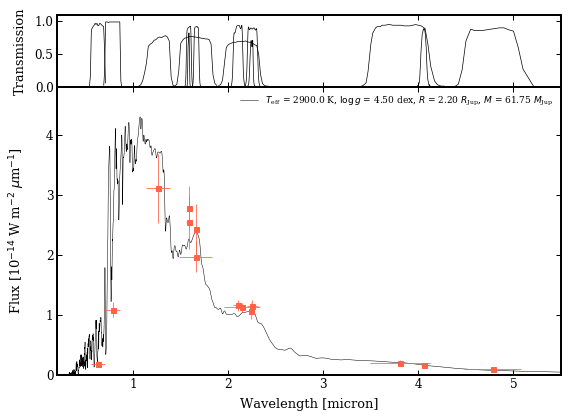

In [18]:
from IPython.display import Image
Image('spectrum.png') 